# **Importar e Instalar las librerias necesarias**

In [114]:
!py -m pip install lightgbm
!py -m pip install fbprophet

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cython-3.1.2-cp311-cp311-win_amd64.whl.metadata (6.0 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.2-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which ve

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\idepedro\AppData\Local\Temp\pip-install-xlhwuv1z\pystan_beb38847226940bda2c75e7d5dd993ca\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Load the Dataset**

In [2]:
df = pd.read_csv("coffee_dataset/index_1.csv")

In [3]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano


# **Visualización del Dataset - Análisis Exploratorio**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [5]:
df.shape

(3636, 6)

In [6]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [7]:
df.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [8]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   object        
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 170.6+ KB


# **EDA (Exploratory Data Analysis)**

## **Daily Sales for the Year**

In [11]:
daily_sales = df.groupby(df['datetime'].dt.date )['money'].sum()

In [12]:
daily_sales

datetime
2024-03-01    396.30
2024-03-02    228.10
2024-03-03    349.10
2024-03-04    135.20
2024-03-05    338.50
               ...  
2025-03-19    623.56
2025-03-20    597.60
2025-03-21    636.80
2025-03-22    365.42
2025-03-23    204.76
Name: money, Length: 381, dtype: float64

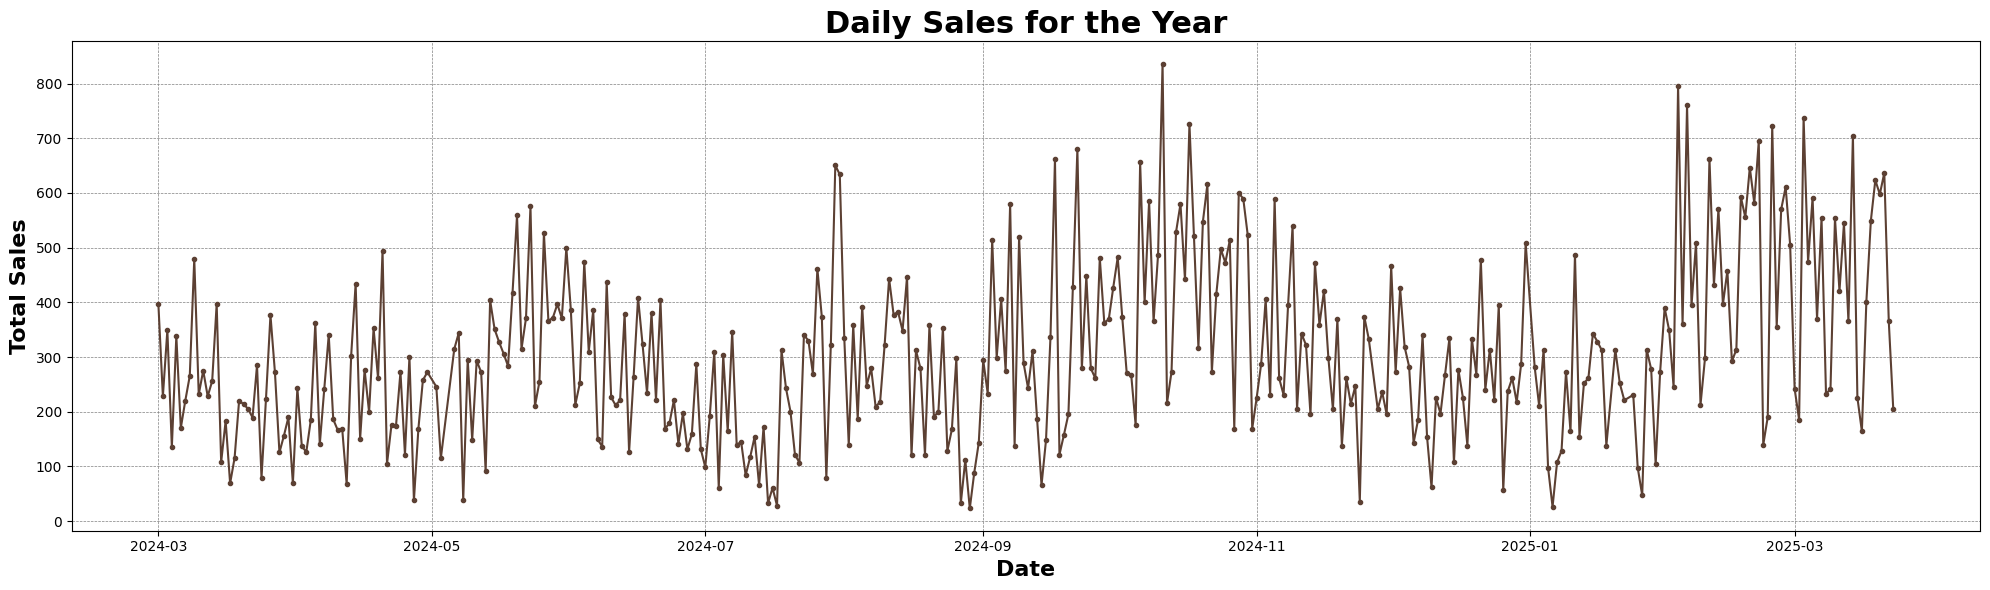

In [13]:
plt.figure(figsize=(20, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='.', linestyle='-', color = "#5C4033")
plt.title('Daily Sales for the Year', fontsize=22, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales', fontsize=16, fontweight='bold')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()
plt.show()

In [14]:
df_macrodata = pd.DataFrame()
df_macrodata['datetime'] = daily_sales.index
df_macrodata['daily_sales'] = daily_sales.values

df_macrodata = df_macrodata.sort_values('daily_sales').reset_index(drop=True)
df_macrodata.set_index('datetime',inplace=True)
df_macrodata.index = pd.to_datetime(df_macrodata.index)
df_macrodata = df_macrodata.sort_index()
df_macrodata

,daily_sales
datetime,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-03-19,623.56
2025-03-20,597.60
2025-03-21,636.80


## Descomposición de Hodrick-Prescott

In [15]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Se separa la descomposición
sales_cycle, sales_trend = hpfilter(df_macrodata['daily_sales'], lamb=1600)

In [16]:
df_macrodata['trend'] = sales_trend
df_macrodata['cycle'] = sales_cycle

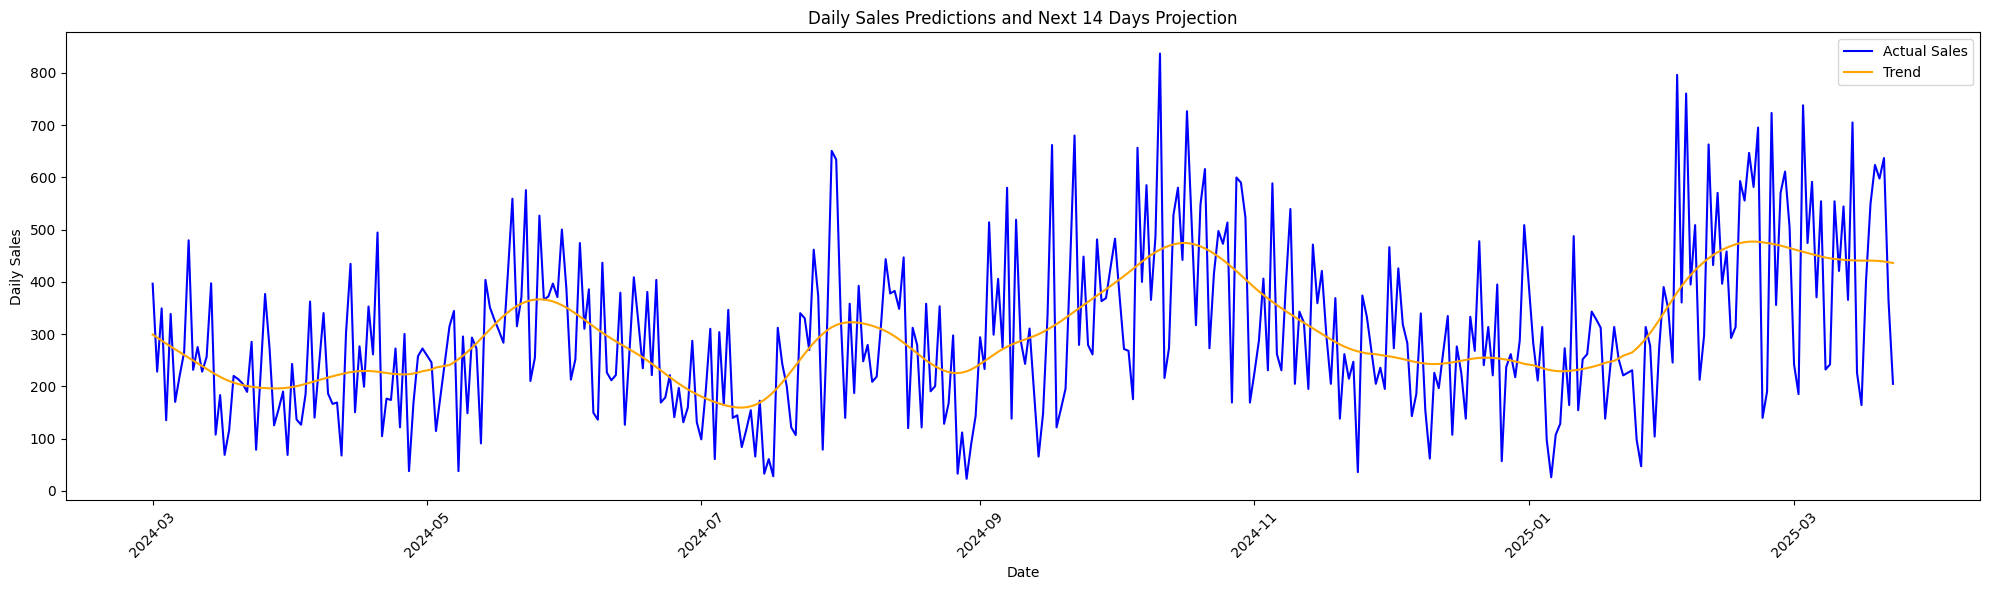

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))

plt.plot(df_macrodata.index,df_macrodata['daily_sales'], label='Actual Sales', color='blue')

plt.plot(df_macrodata.index,df_macrodata['trend'], label='Trend', color='orange', linestyle='-')

# plt.plot(df_macrodata.index,df_macrodata['cycle'], label='Trend', color='green', linestyle='-')

# plt.fill_between(forecast['ds'],
#                 forecast['yhat_lower'],
#                 forecast['yhat_upper'],
#                 color='red',
#                 alpha=0.1,
#                 label='95% Confidence Interval')

plt.title('Daily Sales Predictions and Next 14 Days Projection')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analisis de estacionalidad entre los meses de octubre y diciembre

In [18]:
df_macrodata

,daily_sales,trend,cycle
datetime,,,
2024-03-01,396.30,299.032977,97.267023
2024-03-02,228.10,293.212458,-65.112458
2024-03-03,349.10,287.452731,61.647269
2024-03-04,135.20,281.773893,-146.573893
2024-03-05,338.50,276.234569,62.265431
...,...,...,...
2025-03-19,623.56,440.318285,183.241715
2025-03-20,597.60,439.753883,157.846117
2025-03-21,636.80,438.789483,198.010517


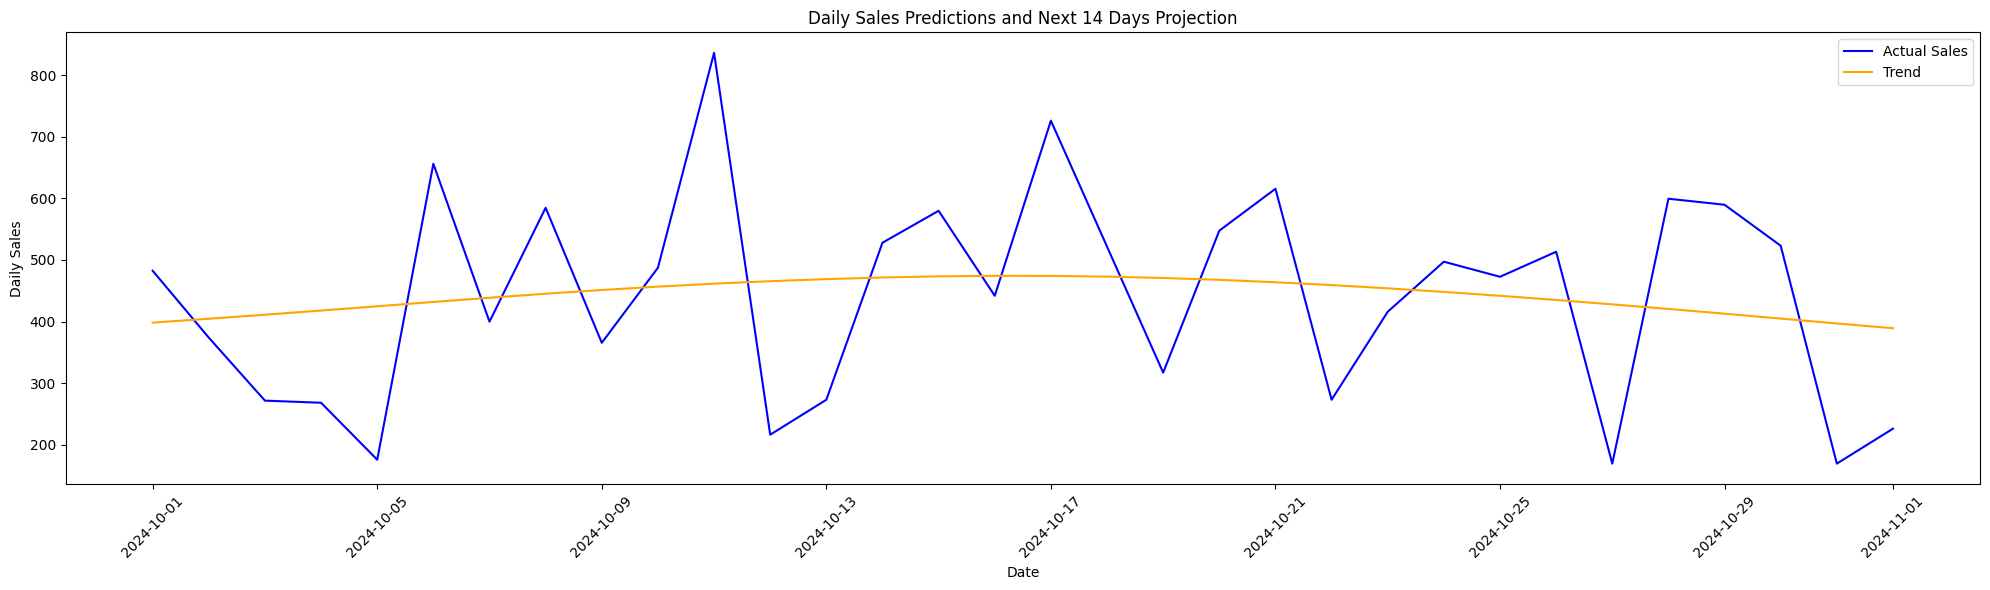

In [19]:
df_q4 = df_macrodata['2024-10-01':'2024-11-01']

fig, ax = plt.subplots(figsize=(20, 6))

plt.plot(df_q4.index,df_q4['daily_sales'], label='Actual Sales', color='blue')

plt.plot(df_q4.index,df_q4['trend'], label='Trend', color='orange', linestyle='-')

# plt.plot(df_macrodata.index,df_macrodata['cycle'], label='Trend', color='green', linestyle='-')

# plt.fill_between(forecast['ds'],
#                 forecast['yhat_lower'],
#                 forecast['yhat_upper'],
#                 color='red',
#                 alpha=0.1,
#                 label='95% Confidence Interval')

plt.title('Daily Sales Predictions and Next 14 Days Projection')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df_q4

,daily_sales,trend,cycle
datetime,,,
2024-10-01,482.50,398.180197,84.319803
2024-10-02,373.76,404.524582,-30.764582
2024-10-03,271.38,411.040249,-139.660249
2024-10-04,267.94,417.788438,-149.848438
2024-10-05,175.36,424.743101,-249.383101
2024-10-06,656.40,431.784535,224.615465
2024-10-07,399.72,438.637174,-38.917174
2024-10-08,584.88,445.165833,139.714167
2024-10-09,365.42,451.211008,-85.791008


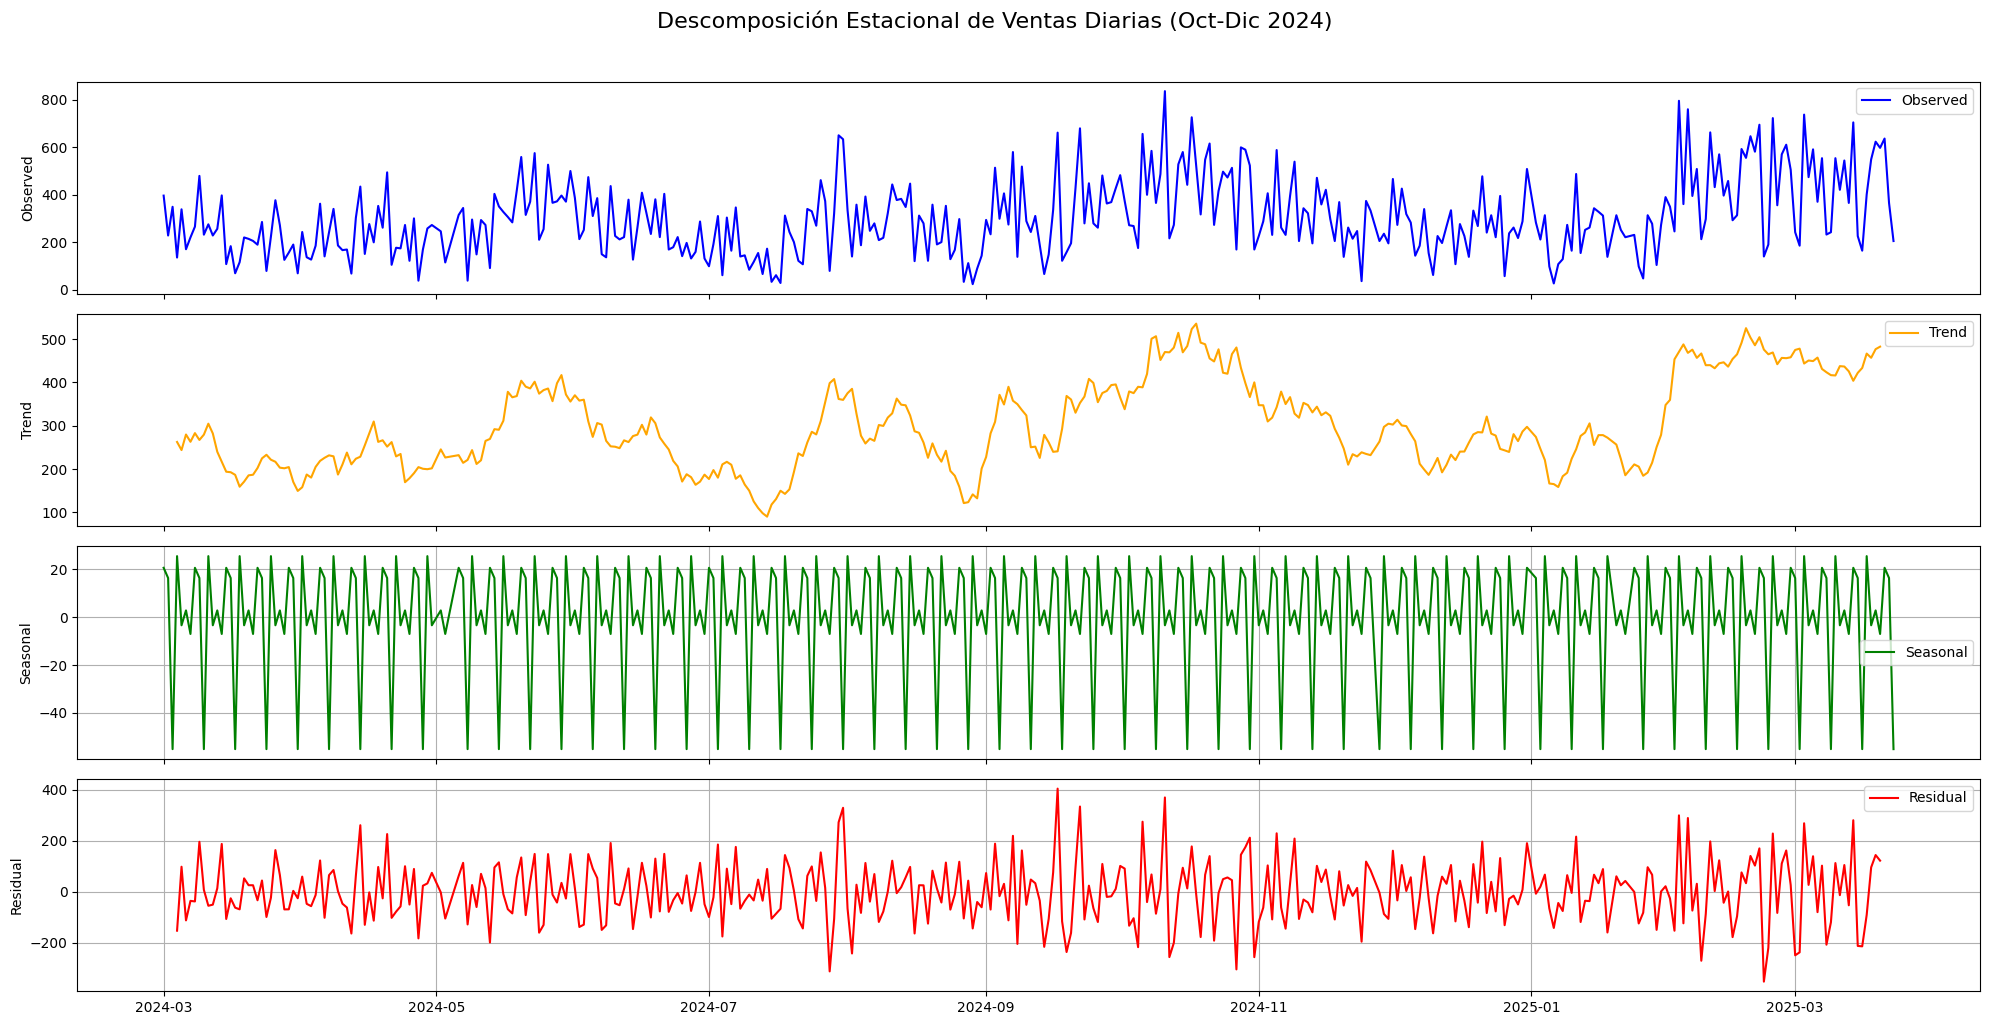

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplica descomposición (suponiendo estacionalidad semanal -> period=7)
result = seasonal_decompose(df_macrodata['daily_sales'], model='additive', period=7)


# Crear figura personalizada
fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

# Graficar cada componente en su subplot
axes[0].plot(result.observed, label='Observed', color='blue')
axes[0].set_ylabel('Observed')
axes[0].legend()

axes[1].plot(result.trend, label='Trend', color='orange')
axes[1].set_ylabel('Trend')
axes[1].legend()

axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

axes[3].plot(result.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()
axes[2].grid()

# Título general
fig.suptitle("Descomposición Estacional de Ventas Diarias (Oct-Dic 2024)", fontsize=16, y=1.02)
plt.tight_layout()
plt.grid()
plt.show()

In [22]:
# SMA con ventana de 7 días
df_macrodata['sma_7'] = df_macrodata['daily_sales'].rolling(window=7).mean()

# EWMA con span de 7 días (más reactivo)
df_macrodata['ewma_7'] = df_macrodata['daily_sales'].ewm(span=7, adjust=False).mean()

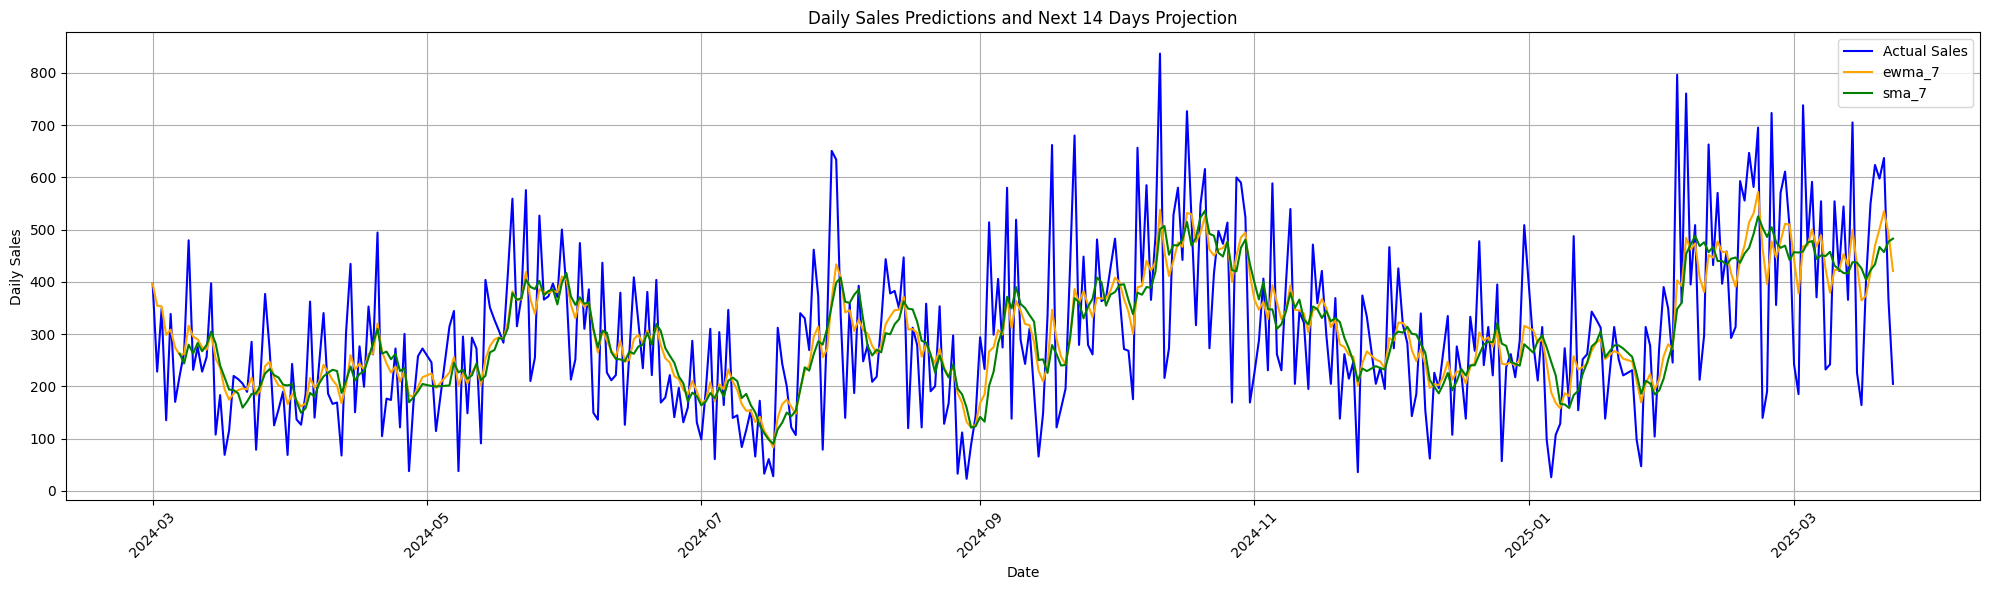

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))

plt.plot(df_macrodata.index,df_macrodata['daily_sales'], label='Actual Sales', color='blue')
plt.plot(df_macrodata.index,df_macrodata['ewma_7'], label='ewma_7', color='orange')
plt.plot(df_macrodata.index,df_macrodata['sma_7'], label='sma_7', color='green')
# plt.plot(df_macrodata.index,df_macrodata['cycle'], label='Trend', color='green', linestyle='-')

# plt.fill_between(forecast['ds'],
#                 forecast['yhat_lower'],
#                 forecast['yhat_upper'],
#                 color='red',
#                 alpha=0.1,
#                 label='95% Confidence Interval')
plt.grid()
plt.title('Daily Sales Predictions and Next 14 Days Projection')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Separar entrenamiento y validación si lo deseas
train = df_macrodata[:'2024-12-31']['daily_sales']  # hasta diciembre 2024
test = df_macrodata['2025-01-01':]['daily_sales']   # para comparar luego

# Ajustar el modelo Holt-Winters (con estacionalidad semanal)
model = ExponentialSmoothing(train,
                             trend='add',
                             seasonal='add',
                             seasonal_periods=7,
                             initialization_method='estimated')
fit = model.fit()

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


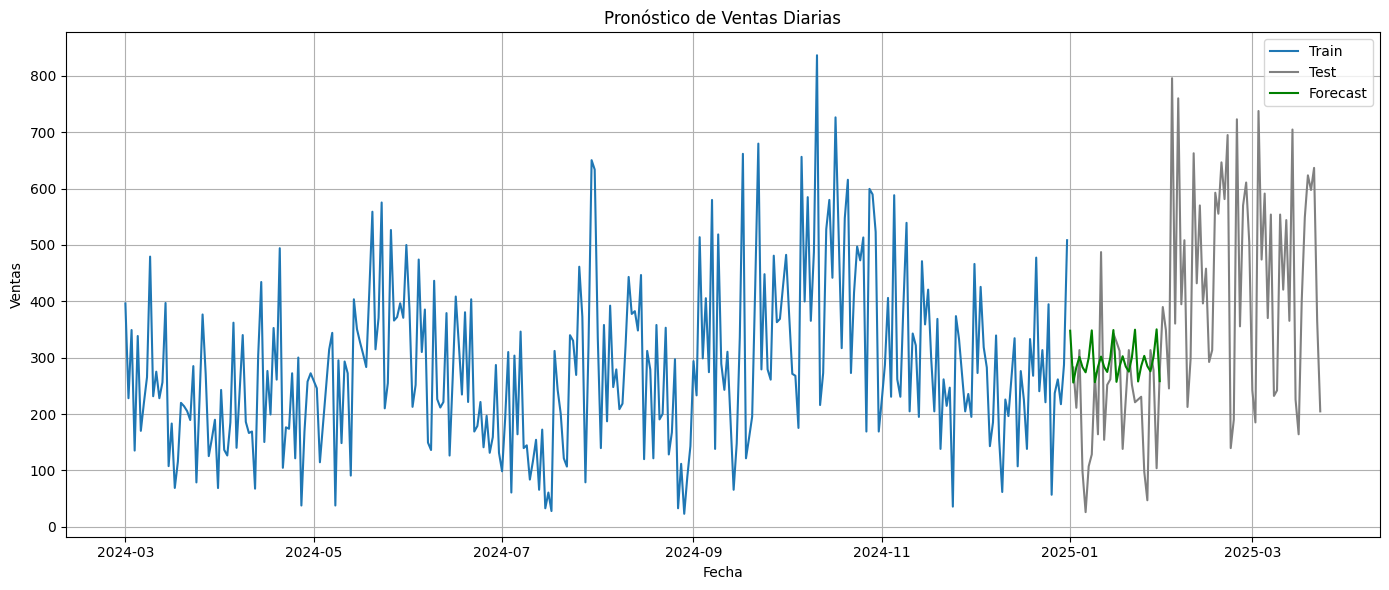

In [25]:
# Crear nuevo índice que comience el 2025-01-01
forecast_index = pd.date_range(start='2025-01-01', periods=30, freq='D')

# Generar pronóstico
forecast = fit.forecast(30)

# Asignar el índice corregido al forecast
forecast.index = forecast_index

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.title('Pronóstico de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
mean_absolute_error(test[:30],forecast)


91.3521560189382

In [27]:
mean_squared_error(test[:30],forecast)

14561.862469492711

In [28]:
np.sqrt(mean_squared_error(test[:30],forecast))


120.6725423180133

Estacionaridad

In [29]:
df_macrodata

,daily_sales,trend,cycle,sma_7,ewma_7
datetime,,,,,
2024-03-01,396.30,299.032977,97.267023,NaN,396.300000
2024-03-02,228.10,293.212458,-65.112458,NaN,354.250000
2024-03-03,349.10,287.452731,61.647269,NaN,352.962500
2024-03-04,135.20,281.773893,-146.573893,NaN,298.521875
2024-03-05,338.50,276.234569,62.265431,NaN,308.516406
...,...,...,...,...,...
2025-03-19,623.56,440.318285,183.241715,433.440000,468.959778
2025-03-20,597.60,439.753883,157.846117,466.608571,501.119833
2025-03-21,636.80,438.789483,198.010517,456.882857,535.039875


In [30]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_macrodata['daily_sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -3.1625473642346136
p-value: 0.022257540844443893


In [31]:
serie_diff1 = df_macrodata['daily_sales'].diff().dropna()
result = adfuller(serie_diff1)
print(f"ADF (1st diff): {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF (1st diff): -8.3021
p-value: 0.0000


plot_acf()	- Diagnosticar autocorrelación general
- Identificar q en modelos ARIMA (MA(q))
plot_pacf()	- Ver qué tan lejos llega la dependencia directa
- Identificar p en modelos ARIMA (AR(p))

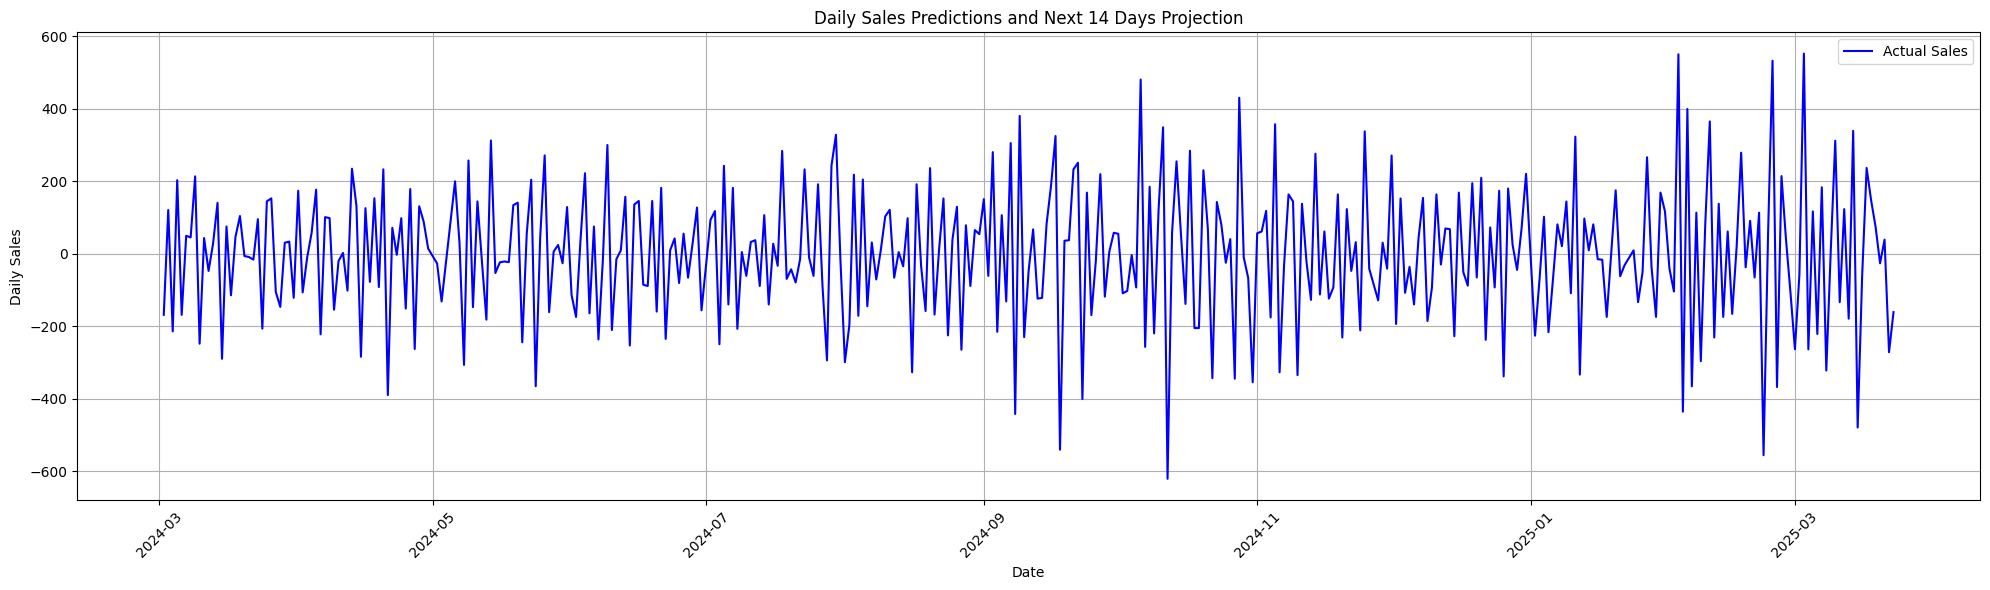

In [32]:
fig, ax = plt.subplots(figsize=(20, 6))

plt.plot(serie_diff1.index,serie_diff1.values, label='Actual Sales', color='blue')
# plt.plot(serie_diff1.index,serie_diff1['cycle'], label='Trend', color='green', linestyle='-')

# plt.fill_between(forecast['ds'],
#                 forecast['yhat_lower'],
#                 forecast['yhat_upper'],
#                 color='red',
#                 alpha=0.1,
#                 label='95% Confidence Interval')
plt.grid()
plt.title('Daily Sales Predictions and Next 14 Days Projection')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Modelo: ARIMA


Como el p valor es 0.02 (<0.05) puedo afirmar que la serie es estacionaria (ADF Statistic: -3.16 p-value: 0.022)

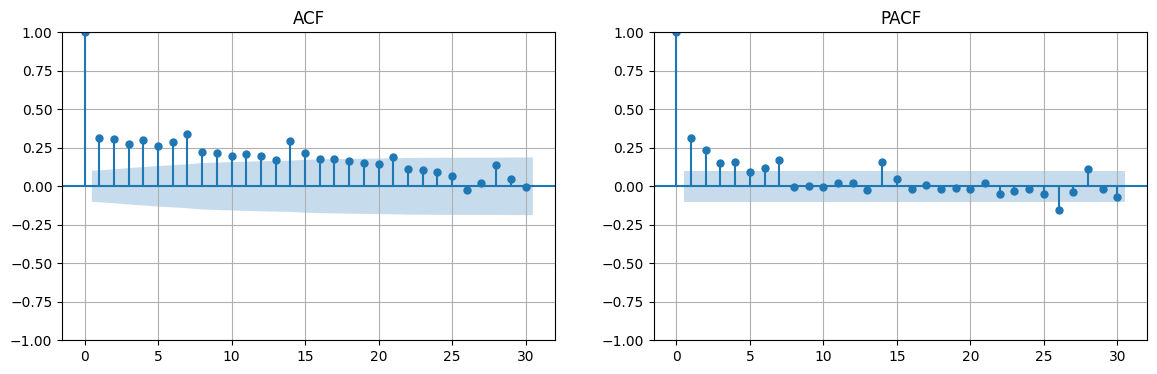

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df_macrodata['daily_sales'], ax=axes[0], lags=30)
axes[0].set_title('ACF')
axes[0].grid()
plot_pacf(df_macrodata['daily_sales'], ax=axes[1], lags=30)
axes[1].set_title('PACF')
axes[1].grid()
plt.show()

se estrae un q de 18 y un p de 5

In [34]:
from statsmodels.tsa.arima.model import ARIMA
p = 5
d = 0
q = 18
model = ARIMA(df_macrodata['daily_sales'], order=(p, d, q))
fit_d0 = model.fit()
print(fit.summary())

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:              daily_sales   No. Observations:                  302
Model:             ExponentialSmoothing   SSE                        5298409.276
Optimized:                         True   AIC                           2973.292
Trend:                         Additive   BIC                           3014.107
Seasonal:                      Additive   AICC                          2974.556
Seasonal Periods:                     7   Date:                 Wed, 11 Jun 2025
Box-Cox:                          False   Time:                         19:54:31
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1421848                alpha                 True
smoothing_trend          

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


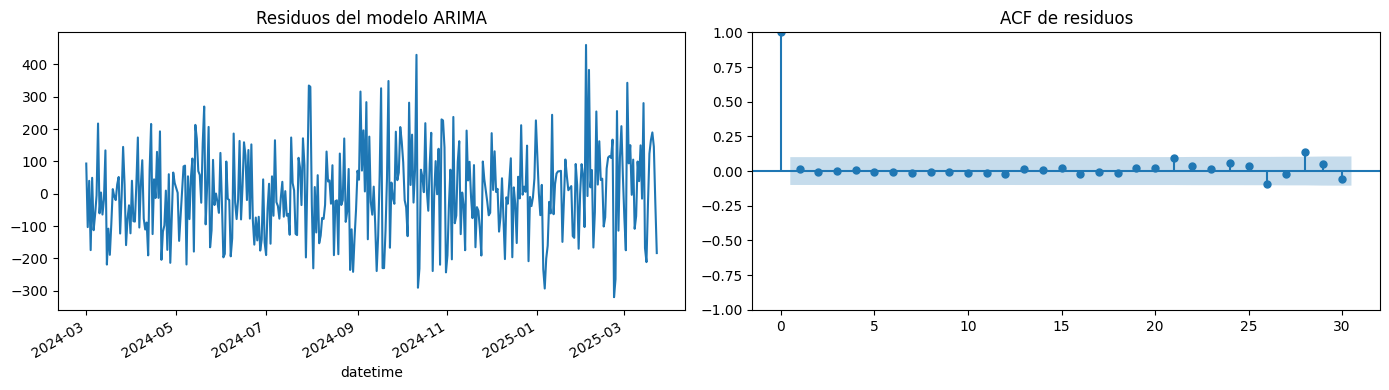

In [35]:
residuals = fit_d0.resid

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
residuals.plot(ax=ax[0], title="Residuos del modelo ARIMA")
plot_acf(residuals, ax=ax[1], lags=30)
ax[1].set_title("ACF de residuos")
plt.tight_layout()
plt.show()

serie_diff

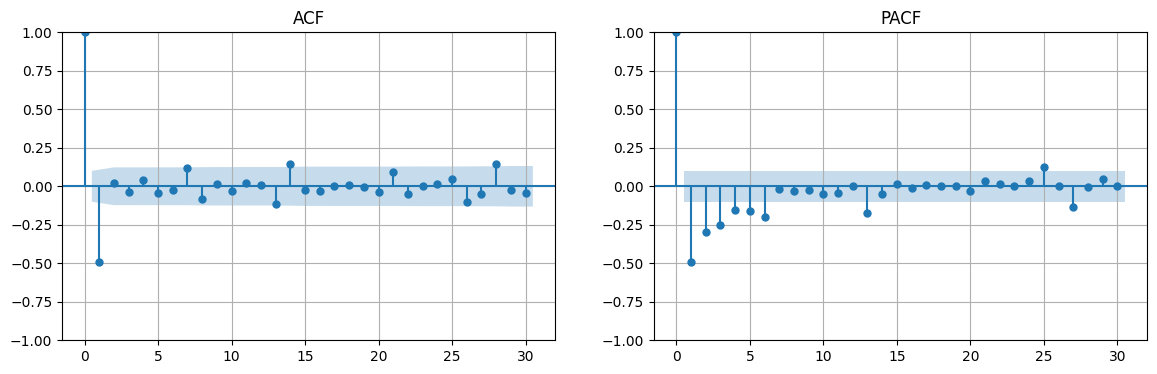

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(serie_diff1, ax=axes[0], lags=30)
axes[0].set_title('ACF')
axes[0].grid()
plot_pacf(serie_diff1, ax=axes[1], lags=30)
axes[1].set_title('PACF')
axes[1].grid()
plt.show()

se estrae un q de 2 y un p de 7

In [37]:
from statsmodels.tsa.arima.model import ARIMA
p = 7
d = 1
q = 2
model = ARIMA(df_macrodata['daily_sales'], order=(p, d, q))
fit_d1 = model.fit()
print(fit.summary())

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:              daily_sales   No. Observations:                  302
Model:             ExponentialSmoothing   SSE                        5298409.276
Optimized:                         True   AIC                           2973.292
Trend:                         Additive   BIC                           3014.107
Seasonal:                      Additive   AICC                          2974.556
Seasonal Periods:                     7   Date:                 Wed, 11 Jun 2025
Box-Cox:                          False   Time:                         19:54:32
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1421848                alpha                 True
smoothing_trend          

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


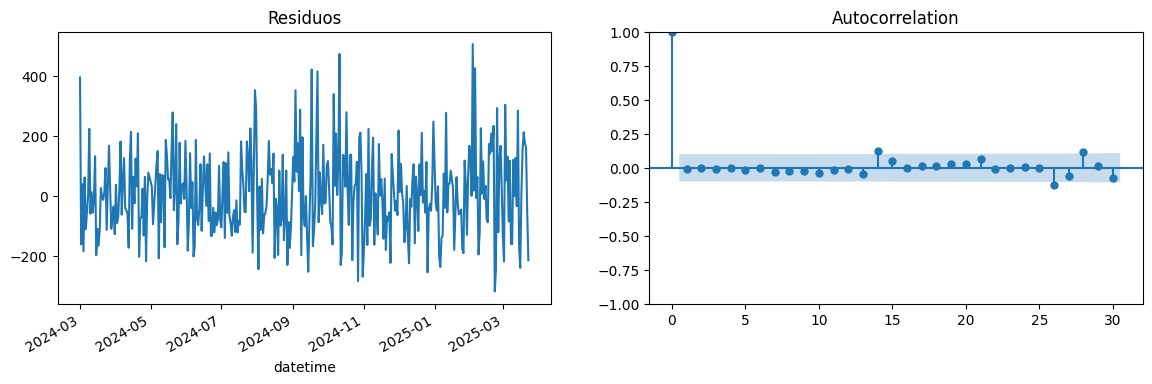

In [38]:
residuals = fit_d1.resid
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
residuals.plot(ax=ax[0], title="Residuos")
plot_acf(residuals, ax=ax[1], lags=30)
plt.show()

In [39]:
fit_d0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            daily_sales   No. Observations:                  381
Model:                ARIMA(5, 0, 18)   Log Likelihood               -2412.489
Date:                Wed, 11 Jun 2025   AIC                           4874.978
Time:                        19:54:33   BIC                           4973.548
Sample:                             0   HQIC                          4914.087
                                - 381                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        302.9869     31.600      9.588      0.000     241.051     364.923
ar.L1          0.3307      0.702      0.471      0.638      -1.046       1.708
ar.L2          0.9232      0.292      3.166      0.002       0.352       1.495
ar.L3          0.0569      0.756      0.075      0.940      -1.425       1.539
ar.L4         -0.7538      0.329     -2.294      0.022      -1.398      -0.110
ar.L5          0.2191      0.531      0.413      0.680      -0.821       1.260
ma.L1         -0.2582      0.695     -0.371      0.710      -1.620       1.104
ma.L2         -0.8471      0.275     -3.079      0.002      -1.386      -0.308
ma.L3         -0.1036      0.698     -0.148      0.882      -1.472       1.265
ma.L4          0.7486      0.350      2.137      0.033       0.062       1.435
ma.L5         -0.1832      0.519     -0.353      0.724      -1.200       0.834
ma.L6          0.0805      0.099      0.813      0.416      -0.114       0.275
ma.L7          0.1255      0.100      1.259      0.208      -0.070       0.321
ma.L8         -0.0621      0.127     -0.490      0.624      -0.310       0.186
ma.L9         -0.1179      0.098     -1.200      0.230      -0.311       0.075
ma.L10         0.0517      0.133      0.390      0.697      -0.208       0.311
ma.L11         0.1613      0.092      1.747      0.081      -0.020       0.342
ma.L12         0.0447      0.150      0.297      0.766      -0.250       0.339
ma.L13        -0.0603      0.108     -0.557      0.577      -0.272       0.152
ma.L14         0.1288      0.111      1.166      0.244      -0.088       0.345
ma.L15         0.1111      0.090      1.229      0.219      -0.066       0.288
ma.L16        -0.0520      0.127     -0.411      0.681      -0.300       0.196
ma.L17        -0.0758      0.084     -0.908      0.364      -0.240       0.088
ma.L18         0.1445      0.108      1.333      0.183      -0.068       0.357
sigma2      2.025e+04   1979.650     10.229      0.000    1.64e+04    2.41e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 7.83
Prob(Q):                              0.78   Prob(JB):                         0.02
Heteroskedasticity (H):               1.43   Skew:                             0.35
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
print(f"AIC: {fit_d0.aic}, BIC: {fit_d0.bic}")

AIC: 4874.977597059717, BIC: 4973.547581437884


In [41]:
fit_d1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            daily_sales   No. Observations:                  381
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -2417.813
Date:                Wed, 11 Jun 2025   AIC                           4855.626
Time:                        19:54:33   BIC                           4895.028
Sample:                             0   HQIC                          4871.261
                                - 381                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0834      0.305      0.273      0.785      -0.515       0.681
ar.L2          0.1166      0.062      1.889      0.059      -0.004       0.238
ar.L3          0.0677      0.063      1.072      0.284      -0.056       0.192
ar.L4          0.1121      0.059      1.911      0.056      -0.003       0.227
ar.L5          0.0589      0.057      1.041      0.298      -0.052       0.170
ar.L6          0.1011      0.057      1.780      0.075      -0.010       0.213
ar.L7          0.1821      0.062      2.951      0.003       0.061       0.303
ma.L1         -0.9518      0.312     -3.046      0.002      -1.564      -0.339
ma.L2         -0.0377      0.306     -0.123      0.902      -0.638       0.563
sigma2      1.958e+04   1316.696     14.870      0.000     1.7e+04    2.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.56
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
print(f"AIC: {fit_d1.aic}, BIC: {fit_d1.bic}")

AIC: 4855.626372701555, BIC: 4895.028085228759


no se puede usar el LLR_test porque el modelo d=1 no se encuentra anidado dentro del no diferenciado

In [43]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(df_macrodata['daily_sales'], order=(0, 1, 1)).fit()
model2 = ARIMA(df_macrodata['daily_sales'], order=(5, 0, 18)).fit()


C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated 

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


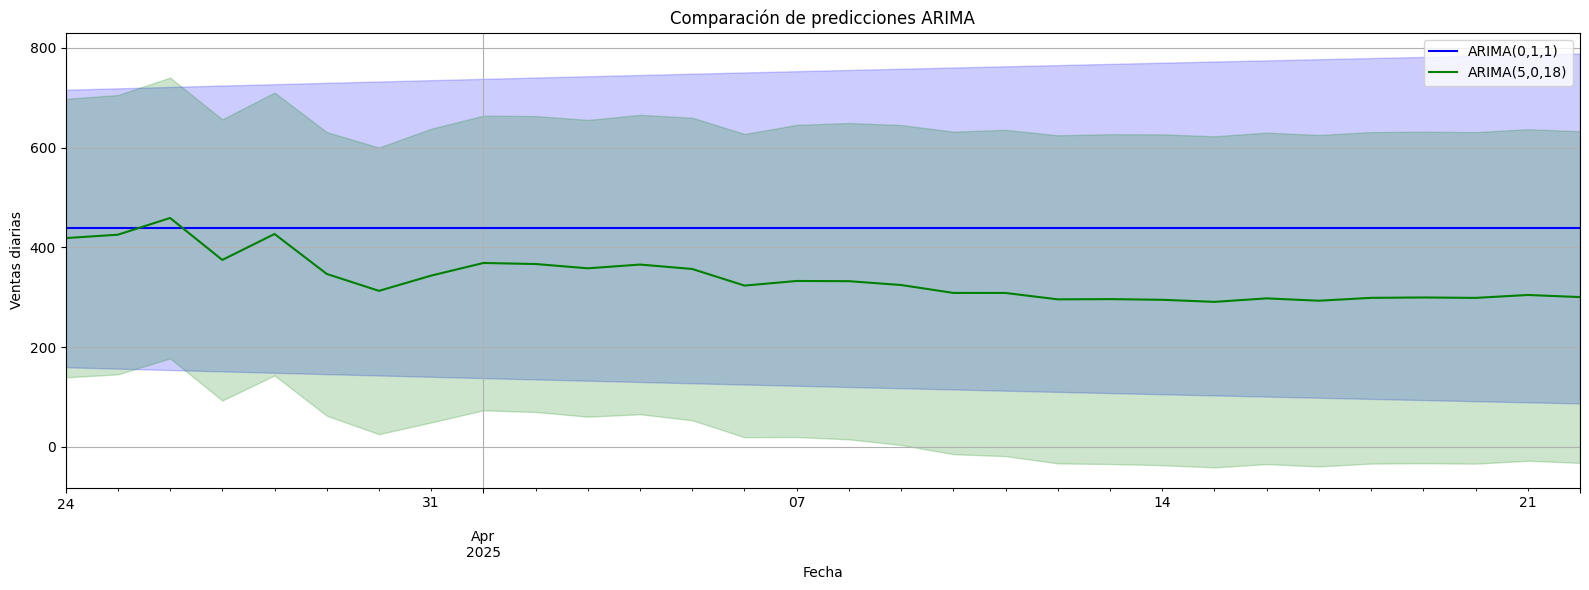

In [44]:
import matplotlib.pyplot as plt

# Definir la cantidad de pasos a predecir
n_steps = 30

# Hacer el forecast
forecast1 = model1.get_forecast(steps=n_steps)
forecast2 = model2.get_forecast(steps=n_steps)

# Crear rango de fechas desde el último índice conocido
last_date = df_macrodata.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_steps, freq='D')

# Obtener las predicciones y los intervalos con índice corregido
pred1 = forecast1.predicted_mean
pred1.index = forecast_index

ci1 = forecast1.conf_int()
ci1.index = forecast_index

pred2 = forecast2.predicted_mean
pred2.index = forecast_index

ci2 = forecast2.conf_int()
ci2.index = forecast_index

# Graficar
fig, ax = plt.subplots(figsize=(16, 6))

# Serie original
#df_macrodata['daily_sales'].plot(ax=ax, label='Datos originales', color='black')

# Modelo 1: ARIMA(0,1,1)
pred1.plot(ax=ax, label='ARIMA(0,1,1)', color='blue')
ax.fill_between(forecast_index, ci1.iloc[:, 0], ci1.iloc[:, 1], color='blue', alpha=0.2)

# Modelo 2: ARIMA(5,0,18)
pred2.plot(ax=ax, label='ARIMA(5,0,18)', color='green')
ax.fill_between(forecast_index, ci2.iloc[:, 0], ci2.iloc[:, 1], color='green', alpha=0.2)

# Estética del gráfico
ax.set_title('Comparación de predicciones ARIMA')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas diarias')
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()


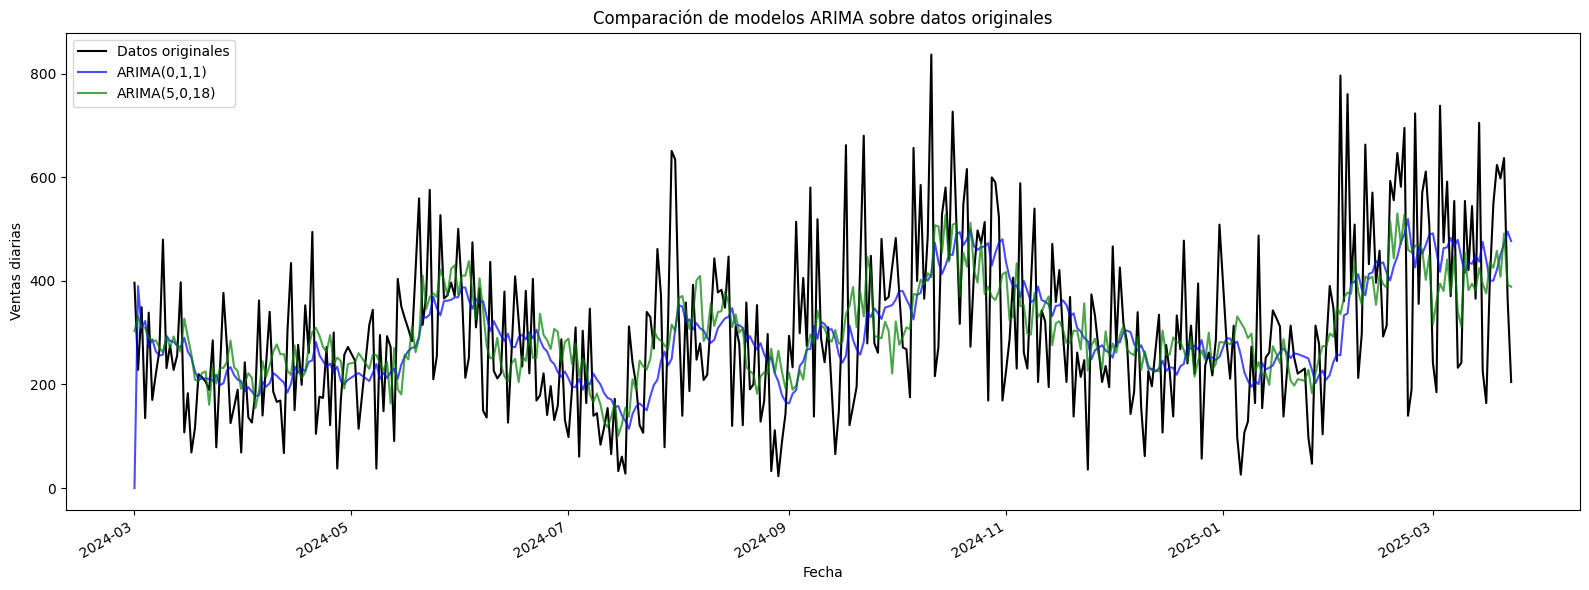

In [45]:
import matplotlib.pyplot as plt

# Obtener predicciones in-sample
fitted1 = model1.fittedvalues
fitted2 = model2.fittedvalues

# Alinear índices si es necesario (opcional)
fitted1.index = df_macrodata.index[-len(fitted1):]
fitted2.index = df_macrodata.index[-len(fitted2):]

# Graficar
fig, ax = plt.subplots(figsize=(16, 6))

# Datos originales
df_macrodata['daily_sales'].plot(ax=ax, label='Datos originales', color='black')

# Predicciones del modelo ARIMA(0,1,1)
fitted1.plot(ax=ax, label='ARIMA(0,1,1)', color='blue', alpha=0.7)

# Predicciones del modelo ARIMA(5,0,18)
fitted2.plot(ax=ax, label='ARIMA(5,0,18)', color='green', alpha=0.7)

# Estética
ax.set_title('Comparación de modelos ARIMA sobre datos originales')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas diarias')
ax.legend()
plt.tight_layout()
plt.show()


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = df_macrodata['daily_sales'].dropna()

mae1 = mean_absolute_error(y_true, fitted1)
mae2 = mean_absolute_error(y_true, fitted2)

print(f"MAE ARIMA(0,1,1): {mae1:.2f}")
print(f"MAE ARIMA(5,0,18): {mae2:.2f}")

MAE ARIMA(0,1,1): 113.06
MAE ARIMA(5,0,18): 107.36


In [47]:
# Definí el punto de corte, por ejemplo: últimos 30 días para test
train_size = int(len(df_macrodata) * 0.9)  # 90% entrenamiento, 10% test
train = df_macrodata['daily_sales'].iloc[:train_size]
test = df_macrodata['daily_sales'].iloc[train_size:]


In [48]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(train, order=(7, 1, 2)).fit()
model2 = ARIMA(train, order=(5, 0, 18)).fit()


C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

In [49]:
forecast1 = model1.get_forecast(steps=len(test))
forecast2 = model2.get_forecast(steps=len(test))

pred1 = forecast1.predicted_mean
pred2 = forecast2.predicted_mean

# Asegurar que el índice coincida
pred1.index = test.index
pred2.index = test.index


C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae1 = mean_absolute_error(test, pred1)
mae2 = mean_absolute_error(test, pred2)

print(f"MAE ARIMA(7,1,2): {mae1:.2f}")
print(f"MAE ARIMA(5,0,18): {mae2:.2f}")


MAE ARIMA(7,1,2): 185.10
MAE ARIMA(5,0,18): 181.61


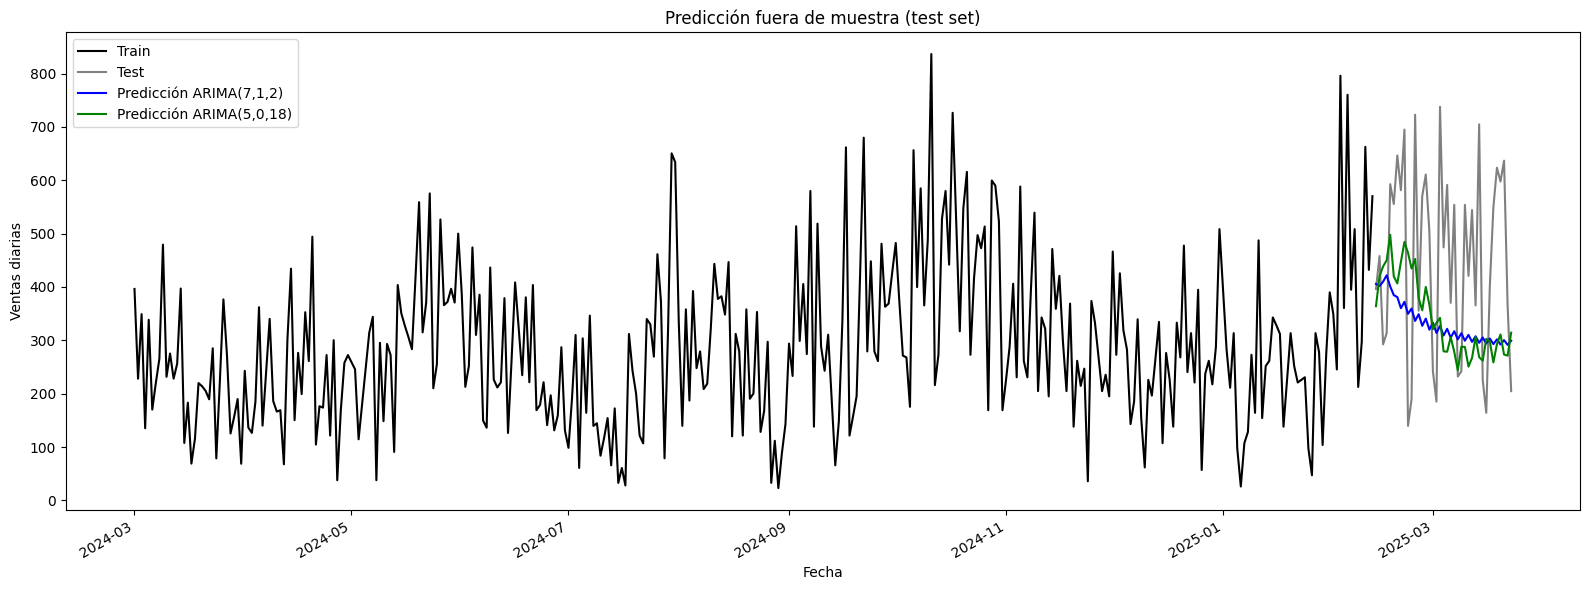

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))

# Original
train.plot(ax=ax, label='Train', color='black')
test.plot(ax=ax, label='Test', color='gray')

# Predicciones
pred1.plot(ax=ax, label='Predicción ARIMA(7,1,2)', color='blue')
pred2.plot(ax=ax, label='Predicción ARIMA(5,0,18)', color='green')

ax.set_title('Predicción fuera de muestra (test set)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas diarias')
ax.legend()
plt.tight_layout()
plt.show()


In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Entrenamiento
model_sarima = SARIMAX(df_macrodata['daily_sales'],
                order=(1, 1, 1),        # parte no estacional
                seasonal_order=(1, 1, 1, 7),  # parte estacional con ciclo de 7 días
                enforce_stationarity=False,
                enforce_invertibility=False).fit()


# Predicción in-sample para todo el rango
in_sample_pred = model_sarima.get_prediction(start=df_macrodata.index[0],
                                           end=df_macrodata.index[-1])
pred_mean = in_sample_pred.predicted_mean

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


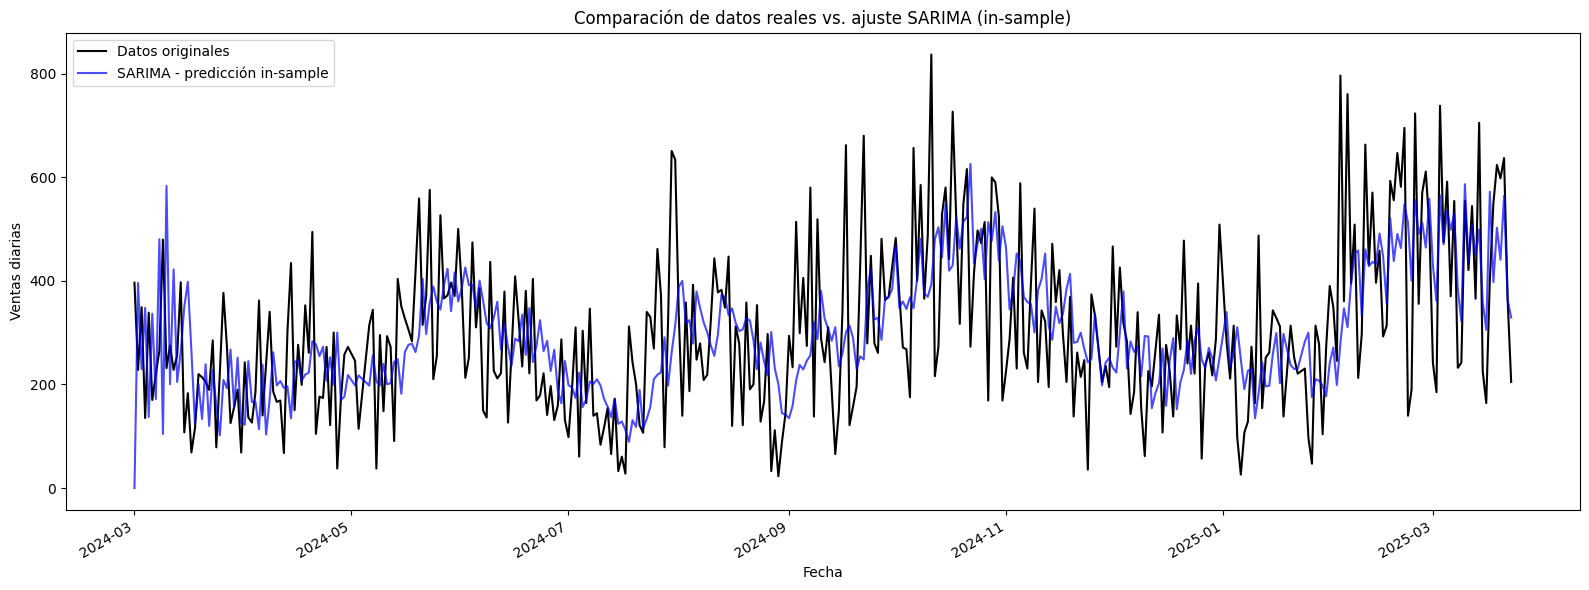

In [53]:

fig, ax = plt.subplots(figsize=(16, 6))

df_macrodata['daily_sales'].plot(ax=ax, label='Datos originales', color='black')
pred_mean.plot(ax=ax, label='SARIMA - predicción in-sample', color='blue', alpha=0.7)

ax.set_title('Comparación de datos reales vs. ajuste SARIMA (in-sample)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas diarias')
ax.legend()
plt.tight_layout()
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mae = mean_absolute_error(df_macrodata['daily_sales'], pred_mean)
rmse = np.sqrt(mean_squared_error(df_macrodata['daily_sales'], pred_mean))

print(f"MAE (in-sample): {mae:.2f}")
print(f"RMSE (in-sample): {rmse:.2f}")

MAE (in-sample): 114.74
RMSE (in-sample): 145.24


In [55]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       daily_sales   No. Observations:                  381
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2318.482
Date:                           Wed, 11 Jun 2025   AIC                           4646.963
Time:                                   19:54:41   BIC                           4666.449
Sample:                                        0   HQIC                          4654.708
                                           - 381                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0028      0.063     -0.044      0.965      -0.126       0.120
ma.L1         -0.8378      0.032    -26.352      0.000      -0.900      -0.776
ar.S.L7       -0.0281      0.069     -0.406      0.685      -0.163       0.107
ma.S.L7       -0.8564      0.041    -21.083      0.000      -0.936      -0.777
sigma2      1.965e+04   1302.084     15.090      0.000    1.71e+04    2.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.16
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             0.36
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


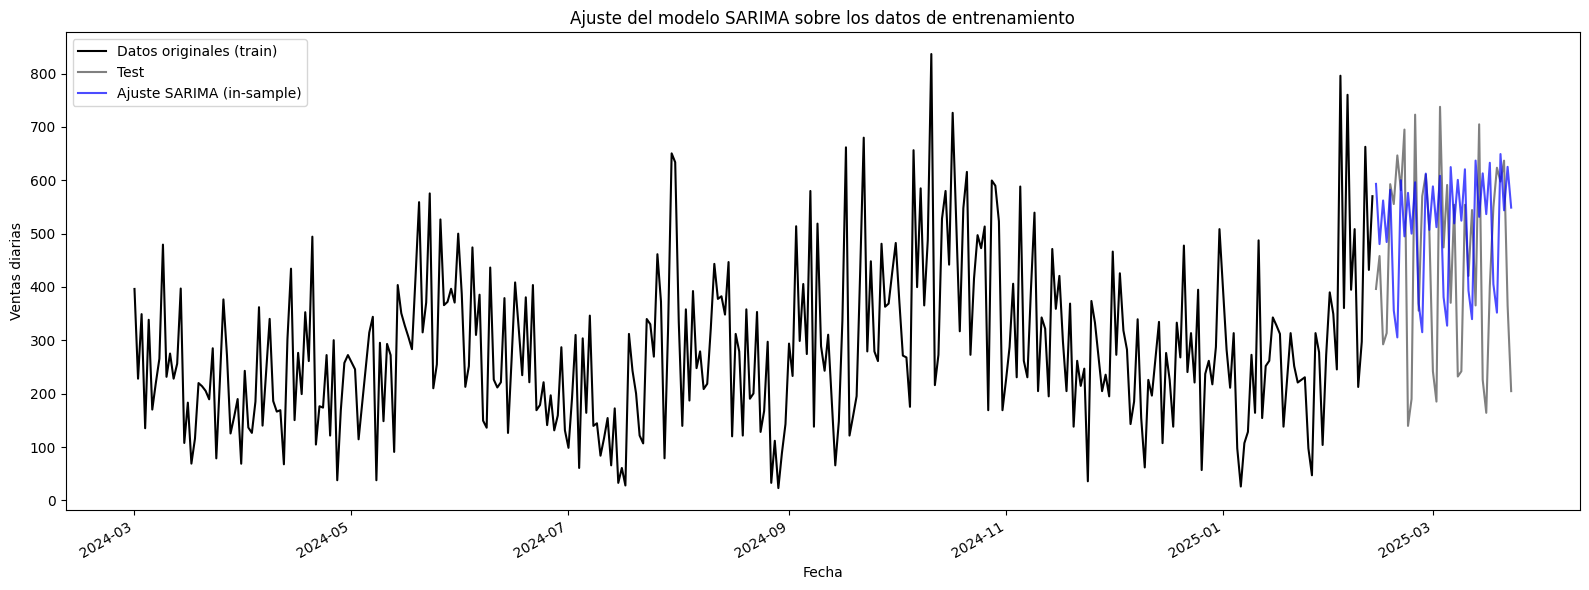

In [56]:
# División temporal: 90% entrenamiento, 10% test
train_size = int(len(df_macrodata) * 0.9)
train = df_macrodata['daily_sales'].iloc[:train_size]
test = df_macrodata['daily_sales'].iloc[train_size:]

forecast_sarima = model_sarima.get_forecast(steps=len(test))


pred_sarima = forecast_sarima.predicted_mean

pred_sarima.index = test.index


fig, ax = plt.subplots(figsize=(16, 6))
train.plot(ax=ax, label='Datos originales (train)', color='black')
test.plot(ax=ax, label='Test', color='gray')
pred_sarima.plot(ax=ax, label='Ajuste SARIMA (in-sample)', color='blue', alpha=0.7)
ax.set_title('Ajuste del modelo SARIMA sobre los datos de entrenamiento')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas diarias')
ax.legend()
plt.tight_layout()
plt.show()

In [57]:
mae_sarima = mean_absolute_error(test, pred_sarima)

print(f"MAE ARIMA(7,1,2): {mae_sarima:.2f}")


MAE ARIMA(7,1,2): 194.21


In [58]:
!py -m pip install pmdarima


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from pmdarima import auto_arima

# División temporal: 90% entrenamiento, 10% test
train_size = int(len(df_macrodata) * 0.9)
train = df_macrodata['daily_sales'].iloc[:train_size]
test = df_macrodata['daily_sales'].iloc[train_size:]


# Estacionalidad semanal → m=7
stepwise_model = auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=10, max_q=10,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=1, D=1,
    seasonal=True,
    m=7,  # estacionalidad semanal
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

stepwise_model.summary()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4653.339, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=4449.126, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=4554.505, Time=0.00 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=4421.449, Time=0.17 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=4517.812, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=4390.338, Time=0.19 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=4419.222, Time=0.11 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=0.54 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=0.30 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=4366.882, Time=0.23 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=4395.371, Time=0.21 sec
 ARIMA(3,1,0)(2,1,1)[7]             : AIC=inf, Time=0.68 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  342
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -2165.632
Date:                           Wed, 11 Jun 2025   AIC                           4347.264
Time:                                   19:54:56   BIC                           4377.753
Sample:                                        0   HQIC                          4359.420
                                           - 342                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8368      0.055    -15.305      0.000      -0.944      -0.730
ar.L2         -0.6581      0.073     -9.002      0.000      -0.801      -0.515
ar.L3         -0.5225      0.082     -6.366      0.000      -0.683      -0.362
ar.L4         -0.3400      0.072     -4.706      0.000      -0.482      -0.198
ar.L5         -0.1618      0.053     -3.078      0.002      -0.265      -0.059
ar.S.L7       -0.7005      0.059    -11.852      0.000      -0.816      -0.585
ar.S.L14      -0.3272      0.049     -6.622      0.000      -0.424      -0.230
sigma2      2.473e+04   1900.121     13.016      0.000     2.1e+04    2.85e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.94   Prob(JB):                         0.67
Heteroskedasticity (H):               1.63   Skew:                             0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
n_periods = len(test)
forecast_autoarima = stepwise_model.predict(n_periods=n_periods)

# # Alineamos con el índice de test
forecast_autoarima_index = test.index
forecast_autoarima_series = pd.Series(forecast_autoarima.values, index=forecast_autoarima_index)

C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


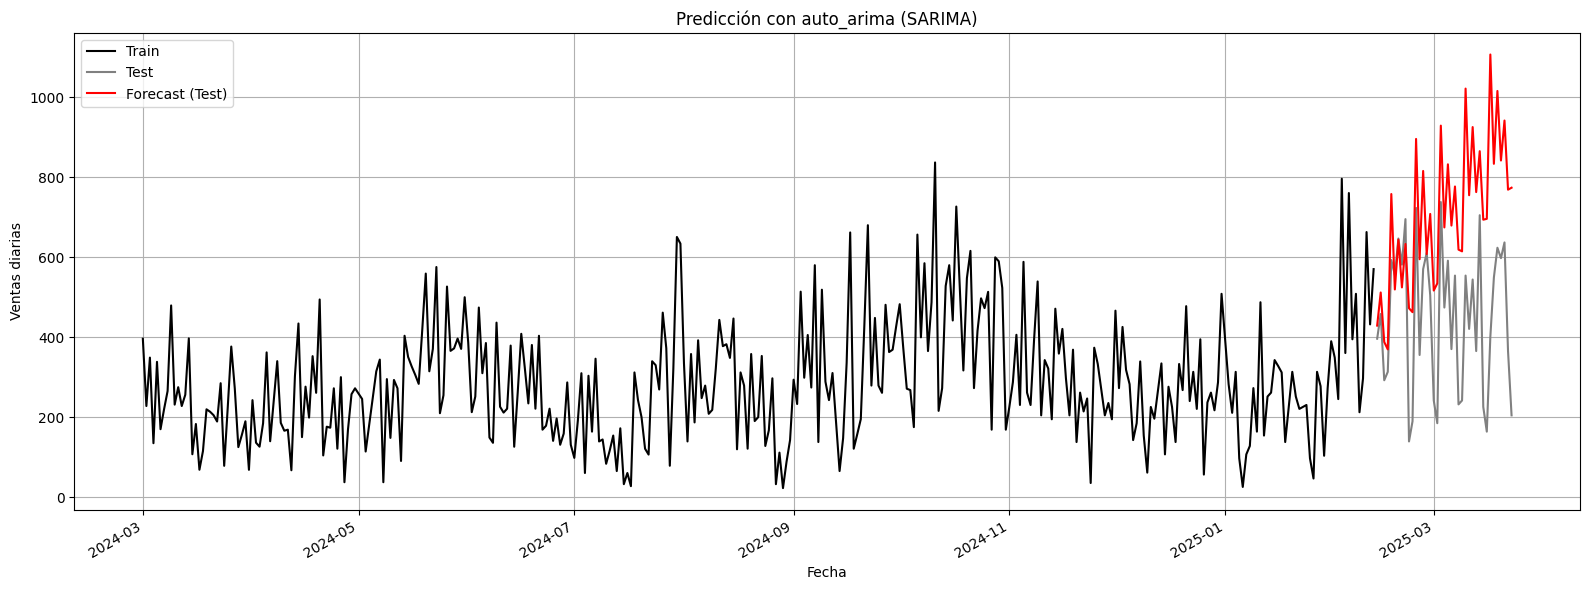

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
train.plot(label='Train', color='black')
test.plot(label='Test', color='gray')
forecast_autoarima_series.plot(label='Forecast (Test)', color='red')
plt.title('Predicción con auto_arima (SARIMA)')
plt.xlabel('Fecha')
plt.ylabel('Ventas diarias')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# LSTM

normalizar los datos (LSTM trabaja mejor con escalas pequeñas):

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Suponiendo que df_macrodata ya tiene el índice como fecha
serie = df_macrodata['daily_sales'].values.reshape(-1, 1)

scaler = MinMaxScaler()
serie_scaled = scaler.fit_transform(serie)

Las redes LSTM no entienden el orden temporal por sí solas si no se lo damos explícitamente. A diferencia de ARIMA o modelos clásicos que están diseñados para datos secuenciales, las redes neuronales necesitan que estructuremos la secuencia manualmente.

In [63]:
def create_sequences(data, lookback=14):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 14
X, y = create_sequences(serie_scaled, lookback)

In [64]:
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [65]:
!py -m pip freeze

absl-py==2.2.2
aiohappyeyeballs==2.4.4
aiohttp==3.11.8
aiosignal==1.3.1
asttokens==2.4.1
astunparse==1.6.3
attrs==24.2.0
cachetools==5.5.2
certifi==2025.1.31
charset-normalizer==3.4.1
cmdstanpy==1.2.5
colorama==0.4.6
comm==0.2.0
contourpy==1.2.0
cycler==0.12.1
Cython==3.1.2
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
et-xmlfile==1.1.0
executing==2.0.1
filelock==3.16.1
filetype==1.2.0
filterpy==1.4.5
flatbuffers==25.2.10
fonttools==4.47.0
frozenlist==1.5.0
fsspec==2024.10.0
gast==0.6.0
google-auth==2.40.3
google-auth-oauthlib==1.2.2
google-pasta==0.2.0
grpcio==1.71.0
h5py==3.13.0
holidays==0.74
idna==3.10
imageio==2.36.0
importlib_resources==6.5.2
ipykernel==6.27.1
ipython==8.18.1
jedi==0.19.1
Jinja2==3.1.4
joblib==1.3.2
jupyter_client==8.6.0
jupyter_core==5.5.1
kagglehub==0.3.11
keras==2.15.0
kiwisolver==1.4.5
lapx==0.5.11
lazy_loader==0.4
libclang==18.1.1
lightgbm==4.6.0
lightning-utilities==0.11.9
lxml==5.3.2
Markdown==3.8
markdown-it-py==3.0.0
MarkupSafe==3.0.2
matplotlib==3.8

In [73]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

ImportError: Traceback (most recent call last):
  File "C:\Users\idepedro\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
import tensorflow
from keras.models import Sequential
# model = Sequential([
#     LSTM(10, activation='relu', input_shape=(lookback, 1)),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse')
# model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

ModuleNotFoundError: No module named 'tensorflow.compat'

In [84]:
df_macrodata['daily_sales']

datetime
2024-03-01    396.30
2024-03-02    228.10
2024-03-03    349.10
2024-03-04    135.20
2024-03-05    338.50
               ...  
2025-03-19    623.56
2025-03-20    597.60
2025-03-21    636.80
2025-03-22    365.42
2025-03-23    204.76
Name: daily_sales, Length: 381, dtype: float64

In [87]:
df_macrodata.index

DatetimeIndex(['2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04',
               '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08',
               '2024-03-09', '2024-03-10',
               ...
               '2025-03-14', '2025-03-15', '2025-03-16', '2025-03-17',
               '2025-03-18', '2025-03-19', '2025-03-20', '2025-03-21',
               '2025-03-22', '2025-03-23'],
              dtype='datetime64[ns]', name='datetime', length=381, freq=None)

20:20:47 - cmdstanpy - INFO - Chain [1] start processing
20:20:48 - cmdstanpy - INFO - Chain [1] done processing


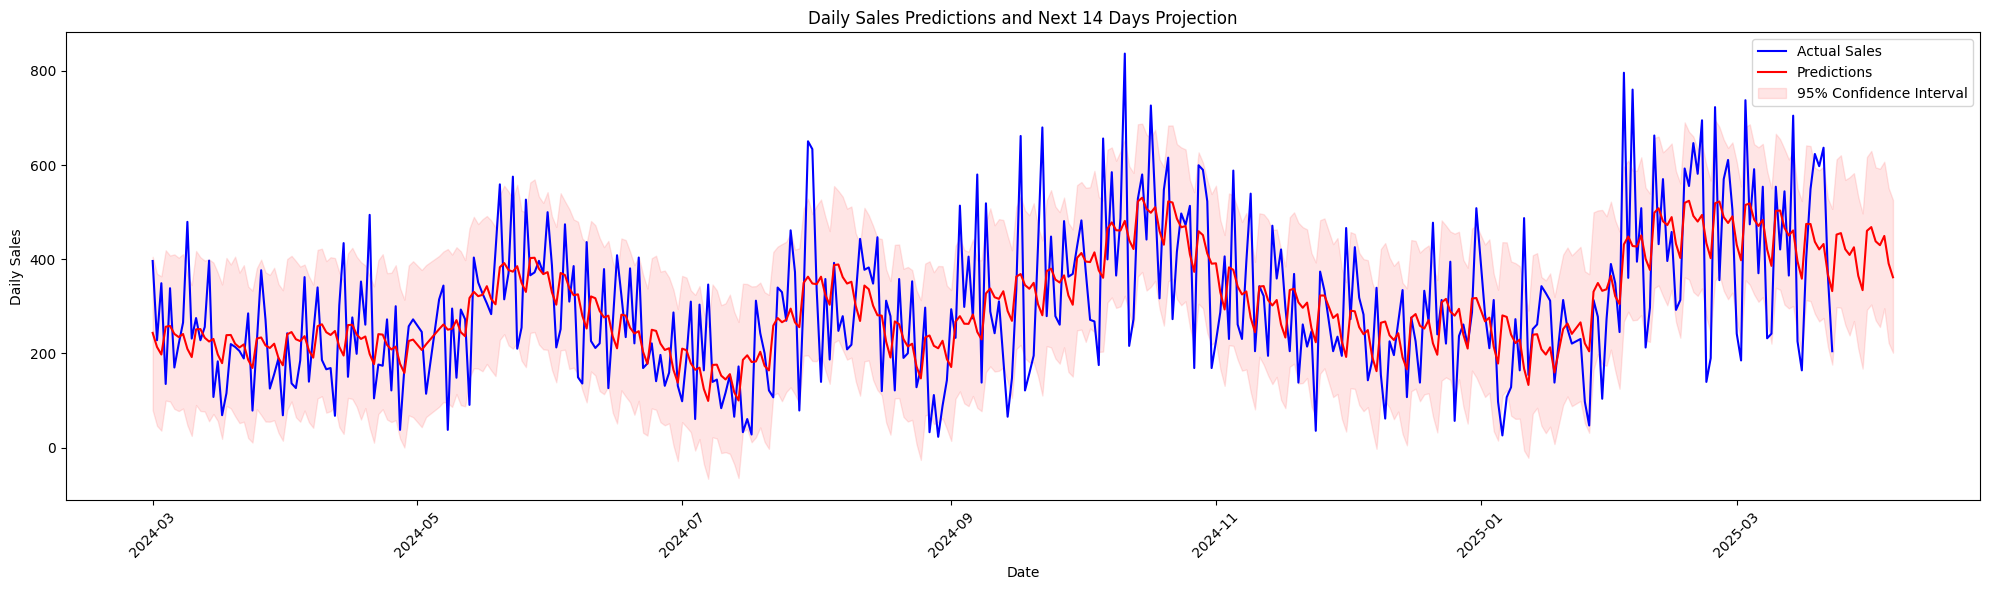

In [ ]:
df_prophet = pd.DataFrame()
# Suponiendo que `df_macrodata` tiene índice datetime y columna 'daily_sales'
df_prophet = df_macrodata.reset_index()[['datetime', 'daily_sales']]
df_prophet.columns = ['ds', 'y']




prophet_model = Prophet(
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='multiplicative'
)

prophet_model.fit(df_prophet)

future_dates = prophet_model.make_future_dataframe(periods=14, freq='D')
forecast = prophet_model.predict(future_dates)

fig, ax = plt.subplots(figsize=(20, 6))

plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual Sales', color='blue')

plt.plot(forecast['ds'], forecast['yhat'], label='Predictions', color='red', linestyle='-')

plt.fill_between(forecast['ds'],
                forecast['yhat_lower'],
                forecast['yhat_upper'],
                color='red',
                alpha=0.1,
                label='95% Confidence Interval')

plt.title('Daily Sales Predictions and Next 14 Days Projection')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [107]:
len(train)

342

In [109]:
forecast['yhat']

0      228.435396
1      231.388826
2      216.745030
3      250.330245
4      271.246670
          ...    
367    356.864907
368    386.526761
369    333.123157
370    336.095466
371    327.813056
Name: yhat, Length: 372, dtype: float64

In [123]:
# Dividir
train_size = int(len(df_macrodata) * 0.95)
train = df_prophet.iloc[:train_size]
test = df_prophet.iloc[train_size:]

# Entrenar con train
model_prophet = Prophet(    
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='multiplicative'
)
model_prophet.fit(train)

# Predecir para el test
future = model_prophet.make_future_dataframe(periods=(len(df_prophet)-train_size))
forecast = model_prophet.predict(future)

# Evaluar
from sklearn.metrics import mean_absolute_error

y_true = test['y'].values
y_pred = forecast['yhat'].iloc[train_size:].values
mae = mean_absolute_error(y_true, y_pred)
print(f"MAE: {mae:.2f}")

20:31:52 - cmdstanpy - INFO - Chain [1] start processing
20:31:52 - cmdstanpy - INFO - Chain [1] done processing


MAE: 130.26


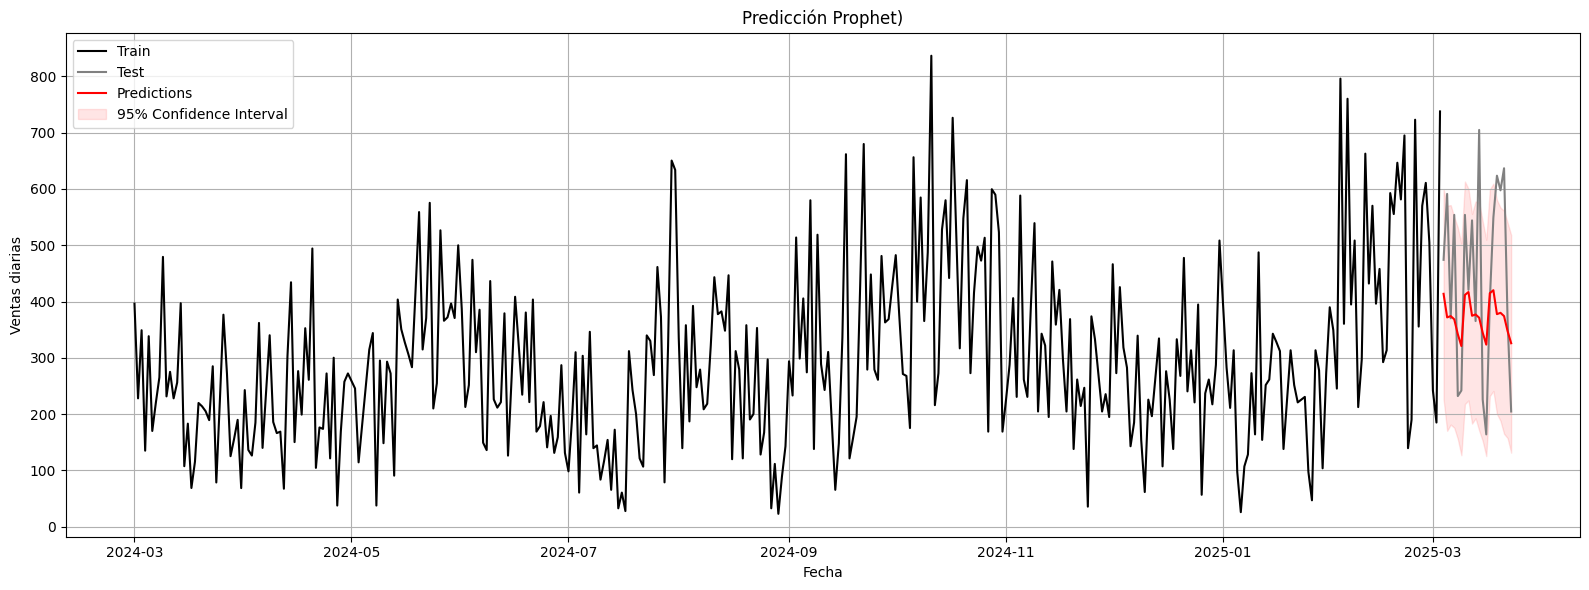

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(train['ds'],train['y'],label='Train', color='black')
plt.plot(test['ds'],test['y'],label='Test', color='grey')
plt.plot(test['ds'], y_pred, label='Predictions', color='red', linestyle='-')

plt.fill_between(test['ds'],
                forecast['yhat_lower'].iloc[train_size:].values,
                forecast['yhat_upper'].iloc[train_size:].values,
                color='red',
                alpha=0.1,
                label='95% Confidence Interval')
# test.plot(label='Test', color='gray')
# forecast_autoarima_series.plot(label='Forecast (Test)', color='red')
plt.title('Predicción Prophet)')
plt.xlabel('Fecha')
plt.ylabel('Ventas diarias')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()